In [93]:
import pandas as pd #Import Pandas
import matplotlib.pyplot as plt #Import Matplotlib
import numpy as np #Import numpy
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Keys / Data Importing

In [60]:
cad_df = pd.read_csv('CAD.csv')
cad_df = cad_df.drop("X", axis=1)
cad_df = cad_df.drop("Y", axis=1)
cad_df = cad_df.drop("OBJECTID", axis=1)
cad_df = cad_df.drop("advisorySpeed", axis=1)
cad_df = cad_df.drop("areaUnitID", axis=1)
cad_df = cad_df.drop("bicycle", axis=1)
cad_df = cad_df.drop("bridge", axis=1)
cad_df = cad_df.drop("bus", axis=1)
cad_df = cad_df.drop("carStationWagon", axis=1)
cad_df = cad_df.drop("cliffBank", axis=1)
cad_df = cad_df.drop("crashDirectionDescription", axis=1)
cad_df = cad_df.drop("crashFinancialYear", axis=1)
cad_df = cad_df.drop("crashLocation1", axis=1)
cad_df = cad_df.drop("crashLocation2", axis=1)
cad_df = cad_df.drop("crashRoadSideRoad", axis=1)
cad_df = cad_df.drop("crashSHDescription", axis=1)
cad_df = cad_df.drop("crashYear", axis=1)
cad_df = cad_df.drop("debris", axis=1)
cad_df = cad_df.drop("directionRoleDescription", axis=1)
cad_df = cad_df.drop("ditch", axis=1)
cad_df = cad_df.drop("fence", axis=1)
cad_df = cad_df.drop("flatHill", axis=1)
cad_df = cad_df.drop("guardRail", axis=1)
cad_df = cad_df.drop("houseOrBuilding", axis=1)
cad_df = cad_df.drop("intersection", axis=1)
cad_df = cad_df.drop("kerb", axis=1)
cad_df = cad_df.drop("meshblockId", axis=1)
cad_df = cad_df.drop("objectThrownOrDropped", axis=1)
cad_df = cad_df.drop("otherObject", axis=1)
cad_df = cad_df.drop("otherVehicleType", axis=1)
cad_df = cad_df.drop("overBank", axis=1)
cad_df = cad_df.drop("parkedVehicle", axis=1)
cad_df = cad_df.drop("pedestrian", axis=1)
cad_df = cad_df.drop("phoneBoxEtc", axis=1)
cad_df = cad_df.drop("postOrPole", axis=1)
cad_df = cad_df.drop("region", axis=1)
cad_df = cad_df.drop("roadCharacter", axis=1)
cad_df = cad_df.drop("roadworks", axis=1)
cad_df = cad_df.drop("schoolBus", axis=1)
cad_df = cad_df.drop("strayAnimal", axis=1)
cad_df = cad_df.drop("suv", axis=1)
cad_df = cad_df.drop("taxi", axis=1)
cad_df = cad_df.drop("slipOrFlood", axis=1)
cad_df = cad_df.drop("temporarySpeedLimit", axis=1)
cad_df = cad_df.drop("tlaId", axis=1)
cad_df = cad_df.drop("tlaName", axis=1)
cad_df = cad_df.drop("trafficControl", axis=1)
cad_df = cad_df.drop("trafficIsland", axis=1)
cad_df = cad_df.drop("trafficSign", axis=1)
cad_df = cad_df.drop("train", axis=1)
cad_df = cad_df.drop("tree", axis=1)
cad_df = cad_df.drop("truck", axis=1)
cad_df = cad_df.drop("unknownVehicleType", axis=1)
cad_df = cad_df.drop("waterRiver", axis=1)


In [61]:
cad_df = cad_df.dropna(axis='rows')
cad_df.head()

,crashSeverity,fatalCount,holiday,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,roadLane,roadSurface,seriousInjuryCount,speedLimit,streetLight,urban,vanOrUtility,vehicle,weatherA,weatherB
60,Non-Injury Crash,0.0,Christmas New Year,Dark,0.0,0.0,0.0,2.0,2-way,Sealed,0.0,100.0,None,Open,0.0,0.0,Light rain,Null
101,Non-Injury Crash,0.0,Christmas New Year,Bright sun,0.0,0.0,0.0,4.0,2-way,Sealed,0.0,80.0,Null,Open,0.0,0.0,Fine,Null
104,Minor Crash,0.0,Christmas New Year,Dark,2.0,0.0,0.0,2.0,2-way,Sealed,0.0,100.0,None,Open,1.0,0.0,Fine,Null
106,Non-Injury Crash,0.0,Queens Birthday,Dark,0.0,0.0,0.0,2.0,2-way,Sealed,0.0,50.0,On,Urban,0.0,0.0,Fine,Null
159,Fatal Crash,1.0,Christmas New Year,Bright sun,1.0,0.0,0.0,2.0,2-way,Sealed,1.0,100.0,None,Open,0.0,0.0,Fine,Null


In [130]:
def convert_to_int(name):
    keydict = {}
    x = 0
    for i in cad_df[name]:
        if i not in keydict.keys():
            keydict[i] = x
            x += 1
            
    cad_df[name].replace(keydict, inplace=True)
    return keydict

cad_df['fatalCount'].replace({2.0:1, 3.0:1, 4.0:1, 5.0:1, 6.0:1, 7.0:1, 8.0:1, 9.0:1}, inplace=True)
print(max(cad_df['fatalCount']))

1.0


In [63]:
crashSevKey = convert_to_int('crashSeverity')
holidayKey = convert_to_int('holiday')
lightKey = convert_to_int('light')
roadLaneKey = convert_to_int('roadLane')
roadSurfKey = convert_to_int('roadSurface')
streetLightKey = convert_to_int('streetLight')
urbanKey = convert_to_int('urban')
weatherAKey = convert_to_int('weatherA')
weatherBKey = convert_to_int('weatherB')

print("DATA KEYS")
print('----------------------------------------------------------------')
print("Crash Severity Key")
print(crashSevKey)
print('----------------------------------------------------------------')
print("Holiday Key")
print(holidayKey)
print('----------------------------------------------------------------')
print("Light Key")
print(lightKey)
print('----------------------------------------------------------------')
print("Road Lane Key")
print(roadLaneKey)
print('----------------------------------------------------------------')
print("Road Surface Key")
print(roadSurfKey)
print('----------------------------------------------------------------')
print("Street Light Key")
print(streetLightKey)
print('----------------------------------------------------------------')
print("Urban Key")
print(urbanKey)
print('----------------------------------------------------------------')
print("Weather A Key")
print(weatherAKey)
print('----------------------------------------------------------------')
print("Weather B Key")
print(weatherBKey)
print('----------------------------------------------------------------')

DATA KEYS
----------------------------------------------------------------
Crash Severity Key
{'Non-Injury Crash': 0, 'Minor Crash': 1, 'Fatal Crash': 2, 'Serious Crash': 3}
----------------------------------------------------------------
Holiday Key
{'Christmas New Year': 0, 'Queens Birthday': 1, 'Labour Weekend': 2, 'Easter': 3}
----------------------------------------------------------------
Light Key
{'Dark': 0, 'Bright sun': 1, 'Overcast': 2, 'Twilight': 3, 'Unknown': 4}
----------------------------------------------------------------
Road Lane Key
{'2-way': 0, '1-way': 1, 'Off road': 2, 'Null': 3}
----------------------------------------------------------------
Road Surface Key
{'Sealed': 0, 'Unsealed': 1, 'Null': 2, 'End of seal': 3}
----------------------------------------------------------------
Street Light Key
{'None': 0, 'Null': 1, 'On': 2, 'Off': 3}
----------------------------------------------------------------
Urban Key
{'Open': 0, 'Urban': 1}
--------------------------

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017980E84970>,
      dtype=object)

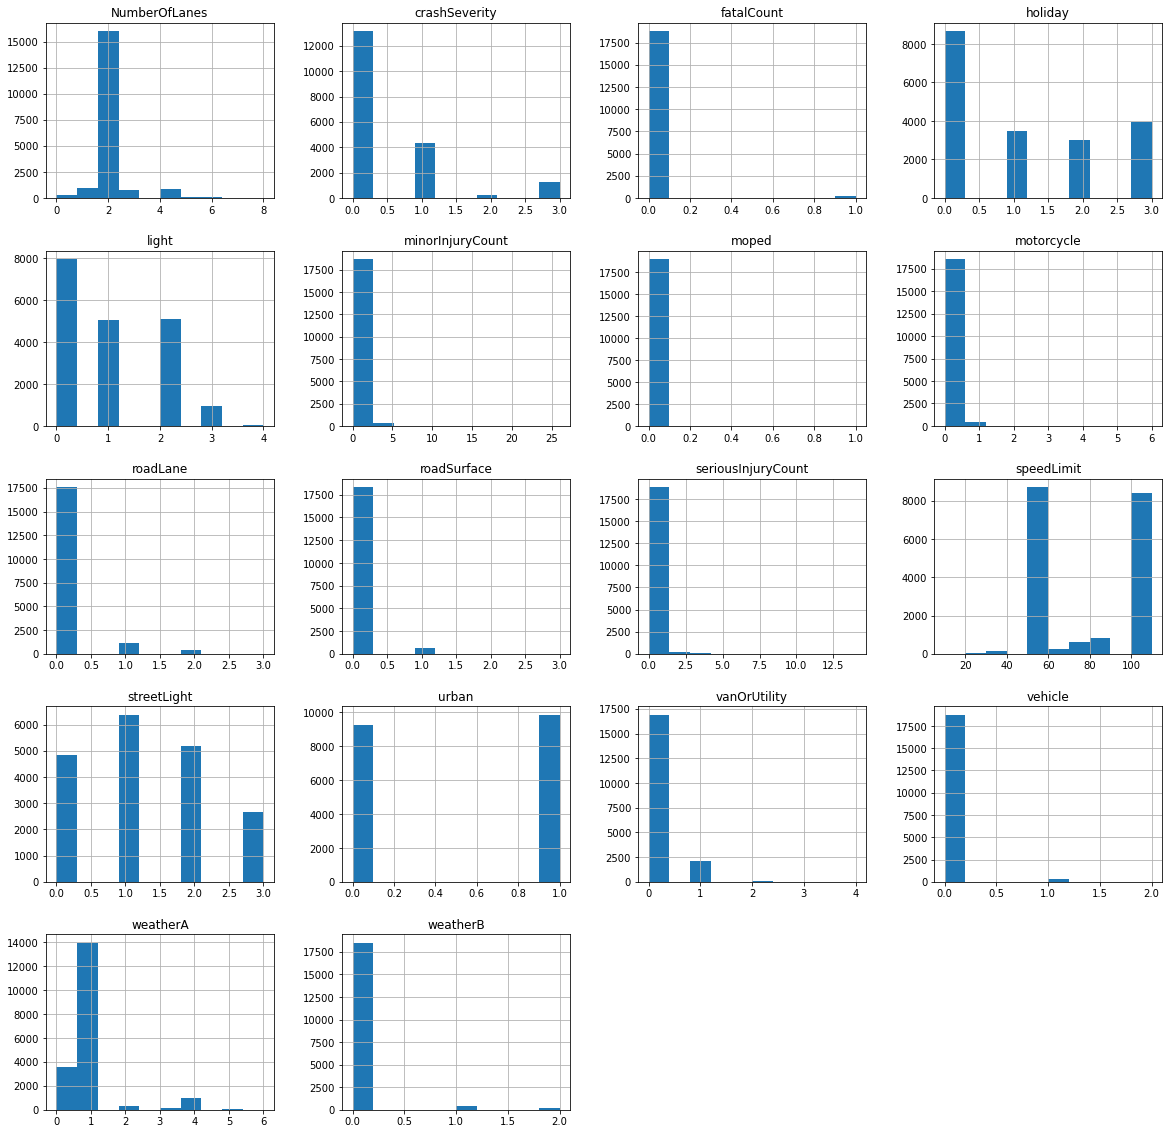

In [131]:
cad_df.hist(column=['crashSeverity', 'fatalCount', 'holiday', 'light',
            'minorInjuryCount', 'NumberOfLanes', 'roadSurface', 'moped',
            'motorcycle', 'roadLane', 'seriousInjuryCount',
            'speedLimit', 'streetLight', 'urban', 'vanOrUtility', 'vehicle',
                     'weatherA', 'weatherB'], figsize=(20,20))

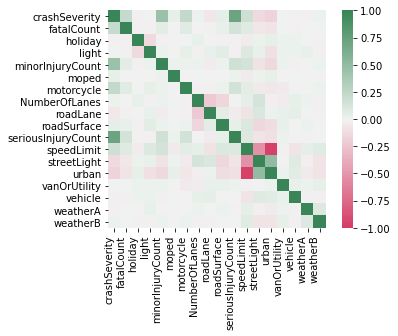

In [132]:
corr = cad_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(1, 500, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [133]:
Y = cad_df['fatalCount']
X = cad_df.loc[:, cad_df.columns != 'fatalCount']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fatalCount   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     65.97
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          4.64e-221
Time:                        18:56:20   Log-Likelihood:                 14543.
No. Observations:               19076   AIC:                        -2.905e+04
Df Residuals:                   19058   BIC:                        -2.891e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0114      0.014     -0.808      0.419      -0.039       0.016
crashSeverity          0.0378      0.002     22.620      0.000       0.035       0.041
holiday               -0.0020      0.001     -2.841      0.004      -0.003      -0.001
light                 -0.0021      0.001     -2.415      0.016      -0.004      -0.000
minorInjuryCount      -0.0103      0.001     -7.852      0.000      -0.013      -0.008
moped                 -0.0300      0.019     -1.590      0.112      -0.067       0.007
motorcycle             0.0136      0.005      2.750      0.006       0.004       0.023
NumberOfLanes          0.0003      0.001      0.263      0.792      -0.002       0.003
roadLane               0.0012      0.002      0.502      0.616      -0.004       0.006
roadSurface            0.0095      0.004      2.207      0.027       0.001       0.018
seriousInjuryCount    -0.0139      0.003     -4.176      0.000      -0.020      -0.007
speedLimit             0.0002      0.000      1.538      0.124   -5.93e-05       0.000
streetLight           -0.0013      0.001     -1.261      0.207      -0.003       0.001
urban                  0.0018      0.007      0.260      0.795      -0.012       0.015
vanOrUtility           0.0014      0.002      0.584      0.559      -0.003       0.006
vehicle               -0.0051      0.006     -0.824      0.410      -0.017       0.007
weatherA               0.0001      0.001      0.142      0.887      -0.002       0.002
weatherB              -0.0032      0.003     -0.941      0.346      -0.010       0.003
==============================================================================
Omnibus:                    24967.000   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3153240.853
Skew:                           7.671   Prob(JB):                         0.00
Kurtosis:                      64.089   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
cad_df = cad_df.drop("moped", axis=1)
cad_df = cad_df.drop("NumberOfLanes", axis=1)
cad_df = cad_df.drop("roadLane", axis=1)
cad_df = cad_df.drop("urban", axis=1)
cad_df = cad_df.drop("vanOrUtility", axis=1)

In [147]:
classifications = cad_df['fatalCount']
features = cad_df.loc[:, cad_df.columns != 'fatalCount']

cols = features.columns

scaler = StandardScaler()

features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns= cols)

x_train, x_test, y_train, y_test = train_test_split(features, classifications, random_state=42)
features.describe()

,crashSeverity,holiday,light,minorInjuryCount,motorcycle,roadSurface,seriousInjuryCount,speedLimit,streetLight,vehicle,weatherA,weatherB
count,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04,1.907600e+04
mean,1.907301e-15,-8.167787e-17,1.477465e-16,3.500729e-16,-3.715517e-16,2.484491e-15,4.318730e-16,-1.874761e-15,-1.013896e-15,1.170469e-15,-3.382885e-16,3.652922e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-5.553666e-01,-9.348341e-01,-1.005855e+00,-4.746687e-01,-1.554648e-01,-1.947677e-01,-2.398189e-01,-2.615238e+00,-1.298719e+00,-1.319431e-01,-1.173806e+00,-1.653471e-01
25%,-5.553666e-01,-9.348341e-01,-1.005855e+00,-4.746687e-01,-1.554648e-01,-1.947677e-01,-2.398189e-01,-9.761981e-01,-1.298719e+00,-1.319431e-01,-2.227485e-02,-1.653471e-01
50%,-5.553666e-01,-9.686148e-02,4.673649e-02,-4.746687e-01,-1.554648e-01,-1.947677e-01,-2.398189e-01,-1.566780e-01,-2.973704e-01,-1.319431e-01,-2.227485e-02,-1.653471e-01
75%,6.598402e-01,7.411111e-01,1.099328e+00,9.012285e-01,-1.554648e-01,-1.947677e-01,-2.398189e-01,1.072602e+00,7.039779e-01,-1.319431e-01,-2.227485e-02,-1.653471e-01
max,3.090254e+00,1.579084e+00,3.204512e+00,3.529866e+01,3.494095e+01,1.515808e+01,3.813465e+01,1.482362e+00,1.705326e+00,1.476124e+01,5.735381e+00,8.006056e+00


In [148]:
print(x_train.shape)
print(y_train.shape)

(14307, 12)
(14307,)


In [154]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
pred = logit.predict(x_test)
print(max(pred))

0.0


In [150]:
print(confusion_matrix(y_test, pred))
print("ACCURACY: {:.2f}%".format(accuracy_score(y_test, pred)*100))

[[4696    0]
 [  73    0]]
ACCURACY: 98.47%


In [151]:
print(y_test.shape)
print(pred.shape)

(4769,)
(4769,)


In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.predict(x_test)
print("KNN SCORE: {:.2f}%".format(100*knn.score(x_train, y_train)))

KNN SCORE: 99.62%


In [153]:
from sklearn import svm
my_model = svm.SVC(kernel='linear', C=10)
my_model.fit(x_train, y_train)
print("SVM SCORE: {:.2f}%".format(100*my_model.score(x_train, y_train)))

SVM SCORE: 98.69%
